In [1]:
import pandas as pd

In [2]:
# url link to the csv file for importing college scorecard data
url = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv'

In [3]:
# url link to the csv file for importing earnings data
url1 = 'https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx'

In [4]:
xl = pd.ExcelFile ('CollegeScorecardDataDictionary.xlsx')

In [5]:
#getting data dictionary
data_dict = xl.parse('data_dictionary')

In [6]:
data_dict.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,Unit ID for institution,root,id,integer,UNITID,NaN,NaN,IPEDS,Shown/used on consumer website.
1,8-digit OPE ID for institution,root,ope8_id,integer,OPEID,NaN,NaN,IPEDS,Shown/used on consumer website.
2,6-digit OPE ID for institution,root,ope6_id,integer,OPEID6,NaN,NaN,IPEDS,Shown/used on consumer website.
3,Institution name,school,name,autocomplete,INSTNM,NaN,NaN,IPEDS,Shown/used on consumer website.
4,City,school,city,autocomplete,CITY,NaN,NaN,IPEDS,Shown/used on consumer website.


In [7]:
#Unique categories from data dictionary
data_dict['dev-category'].unique()

array(['root', 'school', nan, 'admissions', 'academics', 'student', 'cost',
       'aid', 'completion', 'repayment', 'earnings'], dtype=object)

In [8]:
#getting columns from completion
data_columns = data_dict.loc[data_dict['dev-category'].isin (['root', 'school','admissions','academics','cost'])]['VARIABLE NAME']

In [9]:
data_columns1 = data_columns.dropna().tolist()

In [10]:
#remove columns starting with CIP
data_columns2 = [col for col in data_columns1 if (col[:3] =='CIP')]

In [11]:
# Several values in the columns are represented as PrivacySuppressed: replacing them with NULL
df = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv', na_values=['PrivacySuppressed'])

C:\Users\harshvardhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,9,1729,1743) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df1 = df[data_columns1]

In [13]:
df1 = df1.drop(data_columns2, axis=1)

In [14]:
#adding income column to the dataframe that will be predicted using other variables
df1['Income'] = df['MEDIAN_HH_INC']

In [15]:
df1.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ALIAS,ICLEVEL,OPENADMP,ACCREDCODE,T4APPROVALDATE,Income
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,9657.0,7941.0,7017.0,0.7096,AAMU,1,2.0,SACSCC,12/12/1965,49720.22
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,10263.0,17548.0,10221.0,0.9081,NaN,1,2.0,SACSCC,12/1/1965,55735.22
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,17071.0,7113.0,3217.0,1.0000,Southern Christian University |Regions University,1,1.0,SACSCC,3/26/1987,53683.70
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,8917.0,10619.0,9514.0,0.6173,UAH |University of Alabama Huntsville,1,2.0,SACSCC,12/1/1965,58688.62
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,7717.0,7742.0,7940.0,0.6395,NaN,1,2.0,SACSCC,12/1/1965,46065.20


In [16]:
# separating the first digit of Zip to divide schools according to regions from 0 to 9 as categories
df1['ZIP1'] = df1['ZIP'].map(lambda x: int(str(x)[:1]))

In [17]:
df1['ZIP1'].head()

0    3
1    3
2    3
3    3
4    3
Name: ZIP1, dtype: int64

In [18]:
#We developed a separate table using UNITID, name, city and state since these can only be used to identify school
schools = df1[['UNITID', 'INSTNM', 'CITY', 'STABBR']]

In [19]:
schools.head()

,UNITID,INSTNM,CITY,STABBR
0,100654,Alabama A & M University,Normal,AL
1,100663,University of Alabama at Birmingham,Birmingham,AL
2,100690,Amridge University,Montgomery,AL
3,100706,University of Alabama in Huntsville,Huntsville,AL
4,100724,Alabama State University,Montgomery,AL


In [20]:
#Deleting the columns that cant be used for model development: Zip, lat, long, opeid, opeid6, accreditor, school_url, price-calculator_url, repayment_date.median
#separation_date.median, alias, accreditor_code, title_iv.approval_date
other_columns = ['INSTNM', 'CITY','STABBR','OPEID', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2','OPEID6', 'ZIP','ACCREDAGENCY','LATITUDE', 'ALIAS','LONGITUDE', 'INSTURL','NPCURL','ACCREDCODE','T4APPROVALDATE']

In [21]:
df1.drop(other_columns, axis = 1, inplace =True)

In [22]:
df1.shape

(7593, 159)

In [23]:
# checking head of the data
df1.head()

,UNITID,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,...,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income,ZIP1
0,100654,3.0,0,1,1,3,4,1,18.0,10.0,...,17136.0,NaN,9657.0,7941.0,7017.0,0.7096,1,2.0,49720.22,3
1,100663,3.0,0,1,1,3,4,1,15.0,9.0,...,17654.0,NaN,10263.0,17548.0,10221.0,0.9081,1,2.0,55735.22,3
2,100690,3.0,0,1,1,3,4,2,21.0,5.0,...,6900.0,NaN,17071.0,7113.0,3217.0,1.0000,1,1.0,53683.70,3
3,100706,3.0,0,1,1,3,4,1,15.0,9.0,...,20622.0,NaN,8917.0,10619.0,9514.0,0.6173,1,2.0,58688.62,3
4,100724,3.0,0,1,1,3,4,1,18.0,10.0,...,15656.0,NaN,7717.0,7742.0,7940.0,0.6395,1,2.0,46065.20,3


In [24]:
# checking the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 159 entries, UNITID to ZIP1
dtypes: float64(149), int64(10)
memory usage: 9.2 MB


In [25]:
df1.describe()

,UNITID,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,...,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income,ZIP1
count,7.593000e+03,7286.00000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7147.000000,7147.000000,...,4089.000000,2713.000000,7.133000e+03,7.133000e+03,4454.000000,3937.000000,7593.000000,6659.000000,5332.000000,7593.00000
mean,1.765726e+06,1.89720,0.009219,0.738312,7.185566,1.810088,2.202292,2.192282,7.835595,3.496012,...,17285.664466,15261.287136,1.077599e+04,7.872284e+03,6315.360799,0.572069,1.845121,1.335035,57858.541318,4.46398
std,6.771661e+06,0.87879,0.095578,0.439583,21.184166,1.031903,1.318152,0.835941,11.268408,5.650699,...,10757.333888,7670.169218,2.933669e+04,2.152104e+04,2353.782098,0.302035,0.829661,0.472038,12847.325979,2.94627
min,1.006540e+05,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-3.000000,-2.000000,...,580.000000,335.000000,0.000000e+00,0.000000e+00,63.000000,0.000000,1.000000,1.000000,15429.010000,0.00000
25%,1.752630e+05,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-3.000000,-2.000000,...,9100.000000,11685.000000,4.680000e+03,3.527000e+03,4744.250000,0.311900,1.000000,1.000000,49641.660000,2.00000
50%,2.318730e+05,2.00000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,...,14744.000000,15000.000000,9.085000e+03,5.674000e+03,6079.000000,0.550500,2.000000,1.000000,57646.530000,4.00000
75%,4.496120e+05,3.00000,0.000000,1.000000,3.000000,3.000000,4.000000,3.000000,18.500000,9.000000,...,22219.000000,17400.000000,1.403900e+04,8.585000e+03,7624.000000,0.866500,3.000000,2.000000,65758.585000,7.00000
max,4.862110e+07,3.00000,1.000000,1.000000,135.000000,4.000000,4.000000,3.000000,33.000000,15.000000,...,73132.000000,114000.000000,2.339300e+06,1.391500e+06,26084.000000,1.000000,3.000000,2.000000,100870.750000,9.00000


In [26]:
#setting UNITID as the index
df1.set_index('UNITID', inplace=True)

In [27]:
df1.head()

,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,17136.0,NaN,9657.0,7941.0,7017.0,0.7096,1,2.0,49720.22,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,17654.0,NaN,10263.0,17548.0,10221.0,0.9081,1,2.0,55735.22,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,6900.0,NaN,17071.0,7113.0,3217.0,1.0000,1,1.0,53683.70,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,20622.0,NaN,8917.0,10619.0,9514.0,0.6173,1,2.0,58688.62,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,15656.0,NaN,7717.0,7742.0,7940.0,0.6395,1,2.0,46065.20,3


In [28]:
df1.columns

Index(['SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'CCBASIC', 'CCUGPROF', 'CCSIZSET',
       ...
       'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL',
       'PFTFAC', 'ICLEVEL', 'OPENADMP', 'Income', 'ZIP1'],
      dtype='object', length=158)

In [29]:
#checking for columns with less than 40 percent of null data
columns = df1.isnull().sum()/df1.shape[0]*100 < 40  

In [30]:
df2 = df1.loc[:,columns]

In [31]:
df2.head()

,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,PCIP52,PCIP54,DISTANCEONLY,CURROPER,TUITFTE,INEXPFTE,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.1479,0.0000,0.0,1,9657.0,7941.0,1,2.0,49720.22,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,0.1837,0.0188,0.0,1,10263.0,17548.0,1,2.0,55735.22,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,0.3962,0.0000,1.0,1,17071.0,7113.0,1,1.0,53683.70,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,0.2072,0.0117,0.0,1,8917.0,10619.0,1,2.0,58688.62,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.0983,0.0113,0.0,1,7717.0,7742.0,1,2.0,46065.20,3


In [32]:
import numpy as np

In [33]:
#checking for nan values
np.where(np.isnan(df2))

(array([   7,   18,   47, ..., 7592, 7592, 7592], dtype=int64),
 array([62, 63, 63, ..., 60, 62, 63], dtype=int64))

In [34]:
#filling the null data with mean
df2.fillna(df1.mean(), inplace=True).head()

C:\Users\harshvardhan\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,PCIP52,PCIP54,DISTANCEONLY,CURROPER,TUITFTE,INEXPFTE,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.1479,0.0000,0.0,1,9657.0,7941.0,1,2.0,49720.22,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,0.1837,0.0188,0.0,1,10263.0,17548.0,1,2.0,55735.22,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,0.3962,0.0000,1.0,1,17071.0,7113.0,1,1.0,53683.70,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,0.2072,0.0117,0.0,1,8917.0,10619.0,1,2.0,58688.62,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.0983,0.0113,0.0,1,7717.0,7742.0,1,2.0,46065.20,3


In [35]:
df2.columns

Index(['SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL',
       'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'PCIP01', 'PCIP03',
       'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13',
       'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24',
       'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38',
       'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
       'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52',
       'PCIP54', 'DISTANCEONLY', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'ICLEVEL',
       'OPENADMP', 'Income', 'ZIP1'],
      dtype='object')

In [36]:
# finding columns (starts with 'PCIP')that represent percentage of students in different programs and those with less that 90% zeroes
PCIP_main =  []
for col in df2.columns:
    if (col[:4] ==  'PCIP') and (((df2[col] == 0).sum()/df2[col].count()) < 0.9):
        PCIP_main.append(col)
        
print(PCIP_main)

['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54']


In [37]:
df3 = df2.drop(PCIP_main, axis =1)

In [38]:
df3.columns

Index(['SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL',
       'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'PCIP29',
       'DISTANCEONLY', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'ICLEVEL',
       'OPENADMP', 'Income', 'ZIP1'],
      dtype='object')

In [39]:
df3.head()

,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,WOMENONLY,PCIP29,DISTANCEONLY,CURROPER,TUITFTE,INEXPFTE,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.0,0.0,0.0,1,9657.0,7941.0,1,2.0,49720.22,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,0.0,0.0,0.0,1,10263.0,17548.0,1,2.0,55735.22,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,0.0,0.0,1.0,1,17071.0,7113.0,1,1.0,53683.70,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,0.0,0.0,0.0,1,8917.0,10619.0,1,2.0,58688.62,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,0.0,0.0,0.0,1,7717.0,7742.0,1,2.0,46065.20,3


In [40]:
from sklearn.feature_selection import SelectFromModel

In [41]:
y = df3['Income']

In [42]:
X = df3.drop('Income', axis=1)

In [43]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [44]:
# dataframe with just features that have a feature importance > .005 in the random forrest
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
features = sfm.transform(X)

In [45]:
n_features

12

In [46]:
sfm.get_support(indices=True)

array([ 0,  3,  4,  6,  7,  8,  9, 15, 22, 23, 25, 26], dtype=int64)

In [47]:
df3 = df2.iloc[:,sfm.get_support(indices=True)]

In [48]:
df3.describe()

,SCH_DEG,NUMBRANCH,PREDDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,HSI,PCIP05,PCIP09,PCIP11,PCIP12
count,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000
mean,1.897200,7.185566,1.810088,2.192282,7.835595,3.496012,4.125087,0.052889,0.001206,0.012538,0.029879,0.216386
std,0.860839,21.184166,1.031903,0.835941,10.932412,5.482209,6.018086,0.217154,0.010374,0.052172,0.081149,0.375344
min,1.000000,1.000000,0.000000,1.000000,-3.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,-3.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,2.000000,7.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,18.000000,7.000000,8.000000,0.000000,0.000000,0.012538,0.029879,0.216386
max,3.000000,135.000000,4.000000,3.000000,33.000000,15.000000,18.000000,1.000000,0.620700,1.000000,1.000000,1.000000


In [49]:
df3.columns

Index(['SCH_DEG', 'NUMBRANCH', 'PREDDEG', 'CONTROL', 'CCBASIC', 'CCUGPROF',
       'CCSIZSET', 'HSI', 'PCIP05', 'PCIP09', 'PCIP11', 'PCIP12'],
      dtype='object')

In [50]:
df2['Income'].describe()

count      7593.000000
mean      57858.541318
std       10765.618490
min       15429.010000
25%       53022.020000
50%       57858.541318
75%       61966.000000
max      100870.750000
Name: Income, dtype: float64

In [51]:
#normalizing data with income
Income_normalized = (df2['Income']-df2['Income'].min())/(df2['Income'].max()-df2['Income'].min())

In [52]:
Income_normalized.head()

UNITID
100654    0.401340
100663    0.471739
100690    0.447728
100706    0.506305
100724    0.358562
Name: Income, dtype: float64

In [53]:
#checking outliers for continous variables NUMBRANCH, PCIP05, PCIP09, PCIP11, PCIP12
import matplotlib.pyplot as plt
%matplotlib inline

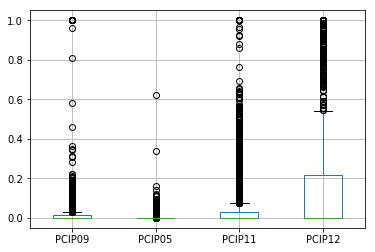

In [54]:
df3.boxplot(column=['PCIP09','PCIP05','PCIP11','PCIP12'])